<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fake-news-detection" data-toc-modified-id="Fake-news-detection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fake news detection</a></span><ul class="toc-item"><li><span><a href="#Feature-extraction-functions" data-toc-modified-id="Feature-extraction-functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Feature extraction functions</a></span></li><li><span><a href="#Reading-and-preparing-the-corpus" data-toc-modified-id="Reading-and-preparing-the-corpus-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Reading and preparing the corpus</a></span></li><li><span><a href="#Parametrization-and-feature-extraction" data-toc-modified-id="Parametrization-and-feature-extraction-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Parametrization and feature extraction</a></span><ul class="toc-item"><li><span><a href="#Generating-N-gram-Feature-Combinations" data-toc-modified-id="Generating-N-gram-Feature-Combinations-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Generating N-gram Feature Combinations</a></span></li></ul></li><li><span><a href="#Frequency-threshold" data-toc-modified-id="Frequency-threshold-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Frequency threshold</a></span></li><li><span><a href="#Weighting-schemes" data-toc-modified-id="Weighting-schemes-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Weighting schemes</a></span></li><li><span><a href="#Classification-Process" data-toc-modified-id="Classification-Process-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Classification Process</a></span><ul class="toc-item"><li><span><a href="#Test-Prediction-and-Result-Evaluating-Fucntion" data-toc-modified-id="Test-Prediction-and-Result-Evaluating-Fucntion-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Test Prediction and Result Evaluating Fucntion</a></span></li><li><span><a href="#Initializing-classification-algorithms" data-toc-modified-id="Initializing-classification-algorithms-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Initializing classification algorithms</a></span></li><li><span><a href="#Cross-Validation-Classification-and-Evaluation-Function" data-toc-modified-id="Cross-Validation-Classification-and-Evaluation-Function-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Cross-Validation Classification and Evaluation Function</a></span></li></ul></li><li><span><a href="#End-to-End-Pipeline" data-toc-modified-id="End-to-End-Pipeline-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>End-to-End Pipeline</a></span><ul class="toc-item"><li><span><a href="#Running-the-Experiment" data-toc-modified-id="Running-the-Experiment-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Running the Experiment</a></span></li></ul></li><li><span><a href="#Additional-Experiments-for-Paper" data-toc-modified-id="Additional-Experiments-for-Paper-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Additional Experiments for Paper</a></span><ul class="toc-item"><li><span><a href="#ROC-values-for-LinerSVC" data-toc-modified-id="ROC-values-for-LinerSVC-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>ROC-values for LinerSVC</a></span></li><li><span><a href="#ROC-curves" data-toc-modified-id="ROC-curves-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>ROC-curves</a></span></li></ul></li><li><span><a href="#Exp-for-EMNLP" data-toc-modified-id="Exp-for-EMNLP-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Exp for EMNLP</a></span></li></ul></li></ul></div>

# Fake news detection

In [294]:
# needed to make it run on Alisa's laptop -- ignore otherwise 
import sys 
#sys.executable, sys.path
sys.path.append('/Users/alisa/workspace/Urdu_Fake_News/envname/lib/python3.7/site-packages')

In [21]:
import re
import glob
import numpy as np
import os
import json
import argparse
import time
import codecs
import string
import codecs
import random
import scipy.sparse as sp
from pathlib import Path

from random import randrange
from scipy.sparse import csr_matrix, csc_matrix, hstack, coo_matrix
from gensim.matutils import Scipy2Corpus, corpus2csc
from gensim.models.logentropy_model import LogEntropyModel
from collections import defaultdict, Counter
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, make_scorer, accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords as sw
from string import punctuation

D:\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Feature extraction functions

In [22]:
#Extracts word-ngrams, when n=1 is equal to bag of words
def wordNgrams(text, n):
    ngrams = []
    text = [word for word in text.split() if word not in string.punctuation]
    ngrams = [' '.join(text[i:i+n])+'' for i in range(len(text)-n+1)]
    return ngrams

In [23]:
text='پاکستان کے وزیراعظم عمران خان سعودی عرب کے دارالحکومت ریاض میں ملک میں سرمایہ کاری کے حوالے سے سالانہ کانفرنس میں شرکت کر رہے ہیں حکومت پاکستان کا کہنا ہے کہ سعودی عرب نے پاکستان کو معاشی بحران سے نمٹنے میں مدد کے لیے ایک سال کے لیے تین ارب ڈالر دینے پر اتفاق کیا ہے دفترِ خارجہ کی جانب سے منگل کی شب جاری ہونے والے اعلامیے میں بتایا گیا ہے کہ یہ فیصلہ'
#wordNgrams(text,2)

In [24]:
#Extracts character n-grams
def charNgrams(text, n):
    ngrams = []
    ngrams = [text[i:i+n]+'_cng' for i in range(len(text)-n+1)]
    return ngrams

In [25]:
#charNgrams(text, 1)

In [26]:
def load_diccionario(ruta):
    terms = set()#Dictionary of slangs
    try:
        tmp = open(ruta, "r", encoding="utf8")     
        while True :
            linea = tmp.readline()                                                                                   
            #linea = to_unicode(linea) 
            if (not linea) or (linea == ""):                                                                               
                break;                                                                                                      
            linea = linea.rstrip()
            terms.add(linea.lower())
        return (terms)
    except IOError as e:
        print ("Error: "+ruta+" I/O error({0}): {1}".format(e.errno, e.strerror))
        exit(1)

In [27]:
#Extracts function words n-grams with a pre-loaded dictionary
def funcNgrams(text, n):
    stop_words = load_diccionario('stop_words.txt')
    patt=r'\b(' + ('|'.join(re.escape(key) for key in stop_words)).lstrip('|') + r')\b'
    pattern = re.compile(patt)
    text = re.sub(r"(\n+|\r+|(\r\n)+)", " ", text)
    text = re.sub(r" +", " ", text)
    text = re.sub(r"’", "'", text)
    text = re.sub(r"[" + punctuation + "]*", "", text)
    terms = pattern.findall(text)
    n_grams=[('_'.join(terms[i:i+n])) + "_fwn" for i in range(len(terms)-n+1)]

    return n_grams

In [28]:
len(funcNgrams(text, 2))

35

In [29]:
def extract_features(text,cn,wn,fn):
    text = text.lower()
    #text=clean_text(text)
    features = []
    for n in wn:
        if n != 0:
            features.extend(wordNgrams(text,n))
    for n in cn:
        if n != 0:
            features.extend(charNgrams(text,n))
    for n in fn:
            if n != 0:
                features.extend(funcNgrams(text,n))
    return features

In [30]:
# Extracts all features in a set of 'texts' and return as a string separated with the simbol '&%$'
def process_texts(texts,cn,wn,fn):
    occurrences=defaultdict(int)
    featuresList=[]
    featuresDict=Counter()
    for (text) in texts:
        features=extract_features(text,cn,wn,fn)
        featuresDict.update(features)
        featuresList.append('&%$'.join(features))
    return featuresList, featuresDict

## Reading and preparing the corpus

In [31]:
def preprocessText(text):
    #here remove text
    cleantext=re.sub("\d+", "0", text)
    return cleantext

In [32]:
#utility function for reading files
def read_txt_files(files):
    text=[]
    topic=[]
    for i,file_path in enumerate(files):
        print('news',file_path)
        with open(file_path,'r', encoding="utf8") as infile:
            cleantext=preprocessText(infile.read())
            text.append(cleantext)
            #print(file_path)
            #file_topic=''.join(re.findall('[A-Za-z]',file_path.split('/')[3].split('.')[0]))
            file_topic=''.join(re.findall('[A-Za-z]', file_path.stem))
            #print (file_topic)
            topic.append(file_topic)
    return text, topic

In [33]:
#reading the path of real and fake news for training

# OS independent way to deal with files using Python3's library pathlib  (added do import)
# see: https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
# declaring paths using Python3's library pathlib

#Experiment number 1
#train_path_real = Path('Corpora/1.Corpus/Train/Real/')
#train_path_fake = Path('Corpora/1.Corpus/Train/Fake/')

#Experiment number 2
#train_path_real = Path('Corpora/2.CorpusMT/Train/Real/')
#train_path_fake = Path('Corpora/2.CorpusMT/Train/Fake/')


#Experiment number 3
#train_path_real = Path('Corpora/3.Corpus_Mixed/Train/Real/')
#train_path_fake = Path('Corpora/3.Corpus_Mixed/Train/Fake/')


#Experiment number 4
#train_path_real = Path('Corpora/4.Corpus_Mixed_Downsize/Train/Real/')
#train_path_fake = Path('Corpora/4.Corpus_Mixed_Downsize/Train/Fake/')


#Experiment number 5
train_path_real = Path('Corpora/5.Cross_MT_Orignal/Train/Real/')
train_path_fake = Path('Corpora/5.Cross_MT_Orignal/Train/Fake/')

#Experiment number 6
#train_path_real = Path('Corpora/6.Cross_Orignal_MT/Train/Real/')
#train_path_fake = Path('Corpora/6.Cross_Orignal_MT/Train/Fake/')


# list(p.glob('**/*.py'))
train_real_news, train_real_news_topics = read_txt_files(sorted(train_path_real.glob('*.txt')))
train_fake_news, train_fake_news_topics = read_txt_files(sorted(train_path_fake.glob('*.txt')))

news Corpora\5.Cross_MT_Orignal\Train\Real\biz01.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz02.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz03.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz04.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz05.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz06.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz07.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz08.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz09.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz10.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz11.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz12.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz13.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz14.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz15.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz16.legit.txt
news Corpora\5.Cross_MT_Orignal\Train\Real\biz17.legit.t

news Corpora\5.Cross_MT_Orignal\Train\Fake\polit26.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\polit27.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\polit28.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\sports01.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\sports02.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\sports03.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\sports04.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\sports05.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\sports06.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\sports07.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\sports08.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\sports09.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\sports10.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\sports11.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\sports12.fake.txt
news Corpora\5.Cross_MT_Orignal\Train\Fake\sports13.fake.txt
news Corpora\5.Cross_MT_Ori

In [34]:
#contatenating real and fake news in one variable for training
train_texts = np.concatenate((train_real_news, train_fake_news))

train_labels_real = np.concatenate((np.ones(len(train_real_news)), np.zeros(len(train_fake_news))))
# swapped real and fake 
train_labels_fake = np.concatenate((np.zeros(len(train_real_news)), np.ones(len(train_fake_news))))

train_topics = np.concatenate((train_real_news_topics, train_fake_news_topics))

In [35]:
print ('Train:')
print ('\t Real:',len(train_real_news))
print ('\t Fake:',len(train_fake_news))

Train:
	 Real: 140
	 Fake: 140


In [36]:
#reading the path of real and fake news for testing

#Experiment Number 1
#test_path_real = Path('Corpora/1.Corpus/Test/Real/')
#test_path_fake = Path('Corpora/1.Corpus/Test/Fake/')


#Experiment Number 2
#test_path_real = Path('Corpora/2.CorpusMT/Test/Real/')
#test_path_fake = Path('Corpora/2.CorpusMT/Test/Fake/')


#Experiment Number 3
#test_path_real = Path('Corpora/3.Corpus_Mixed/Test/Real/')
#test_path_fake = Path('Corpora/3.Corpus_Mixed/Test/Fake/')


#Experiment Number 4
#test_path_real = Path('Corpora/4.Corpus_Mixed_Downsize/Test/Real/')
#test_path_fake = Path('Corpora/4.Corpus_Mixed_Downsize/Test/Fake/')

#Experiment Number 5
test_path_real = Path('Corpora/5.Cross_MT_Orignal/Test/Real/')
test_path_fake = Path('Corpora/5.Cross_MT_Orignal/Test/Fake/')

#Experiment Number 6
#test_path_real = Path('Corpora/6.Cross_Orignal_MT/Test/Real/')
#test_path_fake = Path('Corpora/6.Cross_Orignal_MT/Test/Fake/')



real_news, real_news_topics = read_txt_files(sorted(test_path_real.glob('*.txt')))
fake_news, fake_news_topics = read_txt_files(sorted(test_path_fake.glob('*.txt')))

#contatenating real and fake news in one variable for testing
test_texts = np.concatenate((real_news, fake_news))
test_labels_real = np.concatenate((np.ones(len(real_news)), np.zeros(len(fake_news))))
test_labels_fake = np.concatenate((np.zeros(len(real_news)), np.ones(len(fake_news))))
test_topics = np.concatenate((real_news_topics, fake_news_topics))

news Corpora\5.Cross_MT_Orignal\Test\Real\bus100.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus71.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus72.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus73.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus74.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus75.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus76.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus77.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus78.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus79.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus80.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus81.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus82.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus83.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus84.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus85.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus86.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus87.txt
news Corpora\5.Cross_MT_Orignal\Test\Real\bus88.txt
news Corpor

news Corpora\5.Cross_MT_Orignal\Test\Fake\tch91.txt
news Corpora\5.Cross_MT_Orignal\Test\Fake\tch92.txt
news Corpora\5.Cross_MT_Orignal\Test\Fake\tch93.txt
news Corpora\5.Cross_MT_Orignal\Test\Fake\tch94.txt
news Corpora\5.Cross_MT_Orignal\Test\Fake\tch95.txt
news Corpora\5.Cross_MT_Orignal\Test\Fake\tch96.txt
news Corpora\5.Cross_MT_Orignal\Test\Fake\tch97.txt
news Corpora\5.Cross_MT_Orignal\Test\Fake\tch98.txt
news Corpora\5.Cross_MT_Orignal\Test\Fake\tch99.txt


In [37]:
print ('Test:')
print ('\t Real:',len(real_news))
print ('\t Fake:',len(fake_news))

Test:
	 Real: 150
	 Fake: 112


In [38]:
train_labels_dict = {'real': train_labels_real, 'fake': train_labels_fake}
test_labels_dict = {'real': test_labels_real, 'fake': test_labels_fake}

## Feature extraction

In [39]:
# the class is required to enable proper use of the feature extraction functionality in the experiment pipeline
class FeatureExtractor: 
    """Feature extraction"""
    
    def __init__(self, cnvalues, wnvalues, fnvalues): 
        print('Feature extractor for ' + str(cnvalues[0]) +'-' + str(wnvalues[0]) + '-' + str(fnvalues[0]) + ' char-word-func N-gram combination')
        self.cnvalues = cnvalues
        self.wnvalues = wnvalues
        self.fnvalues = fnvalues
        
        self.vectorizer = CountVectorizer(lowercase=False, min_df=2, tokenizer=lambda x: x.split('&%$')) #--> we can change this
        
    def fit_extract(self, train_texts):
        train_features, dicOfFeatures = process_texts(train_texts, self.cnvalues, self.wnvalues, self.fnvalues)
        train_data = self.vectorizer.fit_transform(train_features)
        train_data = train_data.astype(float)
        return train_data, dicOfFeatures
    
    def extract(self, test_texts): 
        test_features, dicOfFeaturesTest = process_texts(test_texts, self.cnvalues, self.wnvalues, self.fnvalues)
        test_data = self.vectorizer.transform(test_features)
        test_data = test_data.astype(float)
        return test_data, dicOfFeaturesTest            

## Frequency threshold

In [40]:
def apply_frequency_threshold(feature_mx, N=5):
    values=np.array(feature_mx.sum(axis=0)).ravel()
    thresholdMask=(values >= N)*1
    indices_zero = list(np.nonzero(thresholdMask == 0)[0])
    all_cols = np.arange(feature_mx.shape[1])
    cols_to_keep = np.where(np.logical_not(np.in1d(all_cols, indices_zero)))[0]
    return cols_to_keep 

# to use: 
#cols_to_keep = apply_frequency_threshold(train_feature_mx)
#thresholded_train_feat_mx = train_feature_mx[:, cols_to_keep]
#thresholded_test_feat_mx = test_feature_mx[:, cols_to_keep]

## Weighting schemes

In [41]:
# possible values: binary, logent, tfidf, norm, relat
weighting_schemes = ['binary', 'logent', 'tfidf', 'norm', 'relat', 'none (tf)']

In [42]:
from gensim.matutils import Scipy2Corpus, corpus2csc
from gensim.models.logentropy_model import LogEntropyModel

class LogEntWeightScheme: 
        
    def __init__(self): 
        self.log_ent = None
        self.train_data_shape = 1
        
    def fit(self, scaled_train_data, *_):
        Xc = Scipy2Corpus(scaled_train_data)
        self.log_ent = LogEntropyModel(Xc)
        X = self.log_ent[Xc]
        X = corpus2csc(X)
        scaled_train_data = sp.csc_matrix.transpose(X)
        self.train_data_shape = scaled_train_data.shape[1]
        return scaled_train_data
        
    def fit_transform(self, scaled_train_data, *_):    
        Xc = Scipy2Corpus(scaled_train_data)
        self.log_ent = LogEntropyModel(Xc)
        X = self.log_ent[Xc]
        X = corpus2csc(X)
        scaled_train_data = sp.csc_matrix.transpose(X)
        self.train_data_shape = scaled_train_data.shape[1]
        return scaled_train_data 

    def transform(self, scaled_test_data, *_):
        Xtest = Scipy2Corpus(scaled_test_data)
        X = self.log_ent[Xtest]
        X = corpus2csc(X, self.train_data_shape)
        scaled_test_data = sp.csc_matrix.transpose(X)
        return scaled_test_data
        

In [43]:
from scipy.sparse import coo_matrix

class RelativeWeightScheme:
    
    def __init__(self):
        self.s = 1.0
             
    def fit(self, scaled_train_data, *_):
        self.s = scaled_train_data.sum(axis=0)
        scaled_train_data = coo_matrix(np.nan_to_num(scaled_train_data/self.s), dtype=np.float64)
        return scaled_train_data

    # identical to fit()
    def fit_transform(self, scaled_train_data, *_):
        self.s = scaled_train_data.sum(axis=0)
        scaled_train_data = coo_matrix(np.nan_to_num(scaled_train_data/self.s), dtype=np.float64)
        return scaled_train_data
                
    def transform(self, scaled_test_data, *_):          
        scaled_test_data = coo_matrix(np.nan_to_num(scaled_test_data/self.s), dtype=np.float64)
        return scaled_test_data    

In [44]:
class DoNothingWeightScheme:
    """Making it easier to comply with APIs for a do-nothing trasnformer"""

    def __init__(self):
        pass
    
    def fit(self, scaled_train_data, *_):
        return scaled_train_data

    def fit_transform(self, scaled_train_data, *_):
        return scaled_train_data

    def transform(self, scaled_test_data, *_):
        return scaled_test_data
       

In [45]:
def get_weighting_scheme(feature_weight_name): 
    
    if feature_weight_name == 'binary':
        print ("feature_weight = binary")
        return preprocessing.Binarizer()

    elif feature_weight_name == 'logent':
        print ("feature_weight = logent")
        return LogEntWeightScheme()
        
    elif feature_weight_name == 'tfidf':
        print ("feature_weight = tfidf")
        return TfidfTransformer()

    elif feature_weight_name == 'norm':
        # cannot normalize with l2 in a Pipeline
        print ("feature_weight = norm")
        return preprocessing.MaxAbsScaler()

    elif feature_weight_name == 'relat':
        print ("feature_weight = relat")
        return RelativeWeightScheme()

    else:
        print ("feature_weight = tf")
        return DoNothingWeightScheme()         

## Classification Process

### Test Prediction and Result Evaluating Fucntion

In [46]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from IPython.display import display
from mlxtend.plotting import plot_decision_regions

def check_model_fit(clf, X_test, y_test):
    # Print overall test-set accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True)

    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
       
    balanced_acc = balanced_accuracy_score(y_test, y_pred)     
    
    roc_auc = 0.0
    y_pred_scores = []
    if hasattr(clf, 'predict_proba'): 
        y_pred_scores = clf.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_pred_scores[:, 1])        
    
    # Print confusion matrix
    #cmat = confusion_matrix(y_test, y_pred)
    #cols = pd.MultiIndex.from_tuples([('predictions', 0), ('predictions', 1)])
    #indx = pd.MultiIndex.from_tuples([('actual', 0), ('actual', 1)])
    #display(pd.DataFrame(cmat, columns=cols, index=indx))
    #print()
    
    # Print test-set accuracy grouped by the target variable 
    #print('percent accuracy score per class:')
    #cmat = confusion_matrix(y_test, y_pred)
    #scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    # specificity: 
    #irrelevant_acc = scores[0]
    # sensetivity:  
    #relevant_acc = scores[1]
    #balanced_acc = (relevant_acc + irrelevant_acc)/2.0
    #print('left = 0 : {:.2f}%'.format(scores[0]))
    #print('left = 1 : {:.2f}%'.format(scores[1]))
    #print()
    
    # Plot decision regions
    #fig = plt.figure(figsize=(8, 8))
    #N_samples = 200
    #X, y = X_test[:N_samples], y_test[:N_samples]
    #plot_decision_regions(X, y, clf=clf)
    
    #plt.xlabel('satisfaction_level')
    #plt.ylabel('last_evaluation')
    #plt.legend(loc='upper left')
    
    results = {'accuracy': acc, 
               'balanced_accuracy': balanced_acc, 
               'precision': p, 
               'recall': r, 
               'f1': f1, 
               'roc_auc': roc_auc}
    
    return results, y_pred_scores
    

In [47]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import balanced_accuracy_score
#from IPython.display import display
#from mlxtend.plotting import plot_decision_regions

def check_model_fit_no_bal_acc(clf, X_test, y_test):
    # Print overall test-set accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True)

    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
       
    #balanced_acc = balanced_accuracy_score(y_test, y_pred)     
    
    roc_auc = 0.0
    y_pred_scores = []
    if hasattr(clf, 'predict_proba'): 
        y_pred_scores = clf.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_pred_scores[:, 1])        
    
    # Print confusion matrix
    #cmat = confusion_matrix(y_test, y_pred)
    #cols = pd.MultiIndex.from_tuples([('predictions', 0), ('predictions', 1)])
    #indx = pd.MultiIndex.from_tuples([('actual', 0), ('actual', 1)])
    #display(pd.DataFrame(cmat, columns=cols, index=indx))
    #print()
    
    # Print test-set accuracy grouped by the target variable 
    #print('percent accuracy score per class:')
    #cmat = confusion_matrix(y_test, y_pred)
    #scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    # specificity: 
    #irrelevant_acc = scores[0]
    # sensetivity:  
    #relevant_acc = scores[1]
    #balanced_acc = (relevant_acc + irrelevant_acc)/2.0
    #print('left = 0 : {:.2f}%'.format(scores[0]))
    #print('left = 1 : {:.2f}%'.format(scores[1]))
    #print()
    
    # Plot decision regions
    #fig = plt.figure(figsize=(8, 8))
    #N_samples = 200
    #X, y = X_test[:N_samples], y_test[:N_samples]
    #plot_decision_regions(X, y, clf=clf)
    
    #plt.xlabel('satisfaction_level')
    #plt.ylabel('last_evaluation')
    #plt.legend(loc='upper left')
    
    results = {'accuracy': acc, 
               #'balanced_accuracy': balanced_acc, 
               'precision': p, 
               'recall': r, 
               'f1': f1, 
               'roc_auc': roc_auc}
    
    return results, y_pred_scores
    

### Initializing classification algorithms

In [48]:
# AZ:  I don't think we need to balance the classes: 
# first, the data is not so heavily imbalanced 
# second, we loose the class distribution information  

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier

clfLG = LogisticRegression(solver='lbfgs', tol=0.001, C=0.01)
clfLinSVM = LinearSVC(C=0.01, random_state=85)
clfSVC = SVC(C=0.01, kernel='linear')
clfDT = DecisionTreeClassifier(random_state=0)
clfRFC = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clfMnb = MultinomialNB()
clfBnb = BernoulliNB()
clfAB = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0,  random_state=None)

# clfs = [clfLG, clfLinSVM, clfSVC, clfDT, clfRFC, clfMnb, clfBnb,  clfAB]

### Cross-Validation Classification and Evaluation Function

In [49]:
from sklearn.model_selection import cross_validate

def cv(clf, train_X, train_y, scoring=['accuracy', 'balanced_accuracy' ,'precision', 'recall', 'f1', 'roc_auc']): 
    cv = cross_validate(clf, train_X, train_y, cv=5, return_estimator=True, scoring=scoring)
    
    output = {}
    for s in scoring: 
        m = np.mean(cv['test_' + s])
        v = np.var(cv['test_' + s])
        output[s] ={'mean': m, 'var': v}      
    return output

In [50]:
from sklearn.model_selection import cross_validate

def cv(clf, train_X, train_y, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc']): 
    cv = cross_validate(clf, train_X, train_y, cv=5, return_estimator=True, scoring=scoring)
    
    output = {}
    for s in scoring: 
        m = np.mean(cv['test_' + s])
        v = np.var(cv['test_' + s])
        output[s] ={'mean': m, 'var': v}      
    return output

## End-to-End Pipeline

The pipeline function `end_to_end` allows to run an verall experiemnt (apart from the text corpus read-in) easily by specifying the desired patrameters for an experiment: 

* n_gram_feature set  (see the specific format)
* list of weighting schemes
* list of classifiers 

Use the default values as sample examples and see the running example in the cells below.  

Beware that the train and test text sets along with teh training labels packed as a dictionary should be provided

In [51]:
# the end to end experiment pipeline. See below how to run it  
from sklearn.pipeline import Pipeline
import pandas as pd 

def end_to_end(train_texts, train_labels_dict, test_texts, test_labels_dict, 
             ngram_feat_sets=[[[1]],[[0]],[[0]]], weight_schemes=['binary'], clfs=[clfLG], 
             expLog_df=pd.DataFrame(columns=['N-gram-feat-comb', 'char N-gram', 'word N-gram', 'func N-gram'  , 'total_feat_num', 'weight scheme', 'classifier', 'cv-acc', 'cv-balanced_acc','cv-roc', 'cv-f1-fake', 'acc', 'balanced_acc', 'roc', 'f1_fake', 'f1_real']), 
             name_prefix=''):  
    
    all_experiments = {}
    
    cv_scores_stub = {'accuracy': {'mean': -1, 'var': -1},
                        'balanced_accuracy': {'mean': -1, 'var': -1},
                        'precision': {'mean': -1, 'var': -1} ,
                        'recall': {'mean': -1, 'var': -1},
                        'f1': {'mean': -1, 'var': -1},
                        'roc_auc': {'mean': -1, 'var': -1}}
    
    testing_score_stub = {'accuracy': -1, 
                           'balanced_accuracy': -1, 
                           'precision': -1, 
                           'recall': -1, 
                           'f1': -1, 
                           'roc_auc': -1}
    
    
    # for each combination of ngram feature types
    for i in range(len(ngram_feat_sets[0])):         
        cnvalues = ngram_feat_sets[0][i]
        wnvalues = ngram_feat_sets[1][i] 
        fnvalues = ngram_feat_sets[2][i] 
        ngram_feat_type_set_str = str(cnvalues[0]) +'-' + str(wnvalues[0]) + '-' + str(fnvalues[0]) + ' char-word-func'
        char_n_gram = cnvalues[0]
        word_n_gram = wnvalues[0]
        func_n_gram = fnvalues[0]
        
        feat_extractor = FeatureExtractor(cnvalues, wnvalues, fnvalues)        
        train_feature_mx, _ = feat_extractor.fit_extract(train_texts)
        test_feature_mx, _ = feat_extractor.extract(test_texts) 
        print('train shape: ', train_feature_mx.shape, 'test shape:', test_feature_mx.shape)
        
        #applying the frequency threshold
        cols_to_keep = apply_frequency_threshold(train_feature_mx)
        thresholded_train_feat_mx = train_feature_mx[:, cols_to_keep]
        thresholded_test_feat_mx = test_feature_mx[:, cols_to_keep]
        
        #for each weighting scheme, for each classifier, create a pipeline
        pipelines = []
        
        all_experiments[ngram_feat_type_set_str] = {}
        for weight_scheme_name in weight_schemes: 
            all_experiments[ngram_feat_type_set_str][weight_scheme_name] = {}
            weight_scheme = get_weighting_scheme(weight_scheme_name)
            for clf in clfs: 
                clf_name = type(clf).__name__
                print('Classifier: ' + clf_name)
                all_experiments[ngram_feat_type_set_str][weight_scheme_name][clf_name] = {}
                ppl = Pipeline([('scaler', weight_scheme), ('clf', clf)])

                cv_scores_by_labeling = {}
                test_scores_by_labeling = {}
                for key in train_labels_dict:
                    print(key + " run...")
                    train_X = thresholded_train_feat_mx.copy()
                    train_X_cv = thresholded_train_feat_mx.copy()
                    test_X = thresholded_test_feat_mx.copy() 

                    train_y = train_labels_dict[key]
                    test_y = test_labels_dict[key]
                    
                    # cross-validation run 
                    # scoring=['accuracy', 'balanced_accuracy' ,'precision', 'recall', 'f1', 'roc_auc']
                    try: 
                        cv_scores = cv(ppl, train_X_cv, train_y)
                    except Exception as e: 
                        print(e)
                        cv_scores = cv_scores_stub                        
                    cv_scores_by_labeling[key] = cv_scores
                    
                    # test run 
                    try: 
                        ppl.fit(train_X, train_y)
                        #acc, balanced_acc, p, r, f1, roc_auc
                        test_scores, _ = check_model_fit(ppl, test_X, test_y)
                    except Exception as e: 
                        print(e)
                        test_scores = test_scores_stub                        
                    test_scores_by_labeling[key] = test_scores
                
                all_experiments[ngram_feat_type_set_str][weight_scheme_name][clf_name]['cv'] = cv_scores_by_labeling
                all_experiments[ngram_feat_type_set_str][weight_scheme_name][clf_name]['test'] = test_scores_by_labeling
                                
                # record experiments to the log 
                #['N-gram-feat-comb', 'total_feat_num', 'weight scheme', 'classifier', 
                # 'cv-acc', 'cv-balanced_acc','cv-roc', 'cv-f1-fake', 
                # 'acc', 'balanced_acc', 'roc', 'f1_fake', 'f1_real']
                expLog_df.loc[len(expLog_df)] = [name_prefix + ngram_feat_type_set_str, char_n_gram, word_n_gram, func_n_gram, thresholded_train_feat_mx.shape[1], weight_scheme_name, clf_name,
                                           np.round(cv_scores_by_labeling['fake']['accuracy']['mean'], 2), np.round(cv_scores_by_labeling['fake']['balanced_accuracy']['mean'], 2), np.round(cv_scores_by_labeling['fake']['roc_auc']['mean'], 2), np.round(cv_scores_by_labeling['fake']['f1']['mean'], 2), 
                                           np.round(test_scores_by_labeling['fake']['accuracy'], 2), np.round(test_scores_by_labeling['fake']['balanced_accuracy'], 2), np.round(test_scores_by_labeling['fake']['roc_auc'], 2), np.round(test_scores_by_labeling['fake']['f1'], 2), np.round(test_scores_by_labeling['real']['f1'], 2)]
                
                expLog_df
                
    return all_experiments, expLog_df

### ROC-curves 

#### ROC-values for LinerSVC

In [52]:
from sklearn.calibration import CalibratedClassifierCV

isotonic_svc = CalibratedClassifierCV(
    base_estimator=clfLinSVM,
    method='isotonic'
) # isotonic calibration

#isotonic_svc.fit(X_train, y_train)
#y_prob = isotonic_svc.predict_proba(X_test)

In [53]:
from sklearn.pipeline import Pipeline

def end_to_end_roc(train_texts, train_labels_dict, test_texts, test_labels_dict, 
             ngram_feat_sets=[[[1]],[[0]],[[0]]], weight_schemes=['binary'], clfs=[clfLG]):  
    
    all_experiments = {}
    
    testing_score_stub = {'accuracy': -1, 
                           'balanced_accuracy': -1, 
                           'precision': -1, 
                           'recall': -1, 
                           'f1': -1, 
                           'roc_auc': -1}
    
    
    # for each combination of ngram feature types
    for i in range(len(ngram_feat_sets[0])):         
        cnvalues = ngram_feat_sets[0][i]
        wnvalues = ngram_feat_sets[1][i] 
        fnvalues = ngram_feat_sets[2][i] 
        ngram_feat_type_set_str = str(cnvalues[0]) +'-' + str(wnvalues[0]) + '-' + str(fnvalues[0]) + ' char-word-func'
        char_n_gram = cnvalues[0]
        word_n_gram = wnvalues[0]
        func_n_gram = fnvalues[0]
        
        feat_extractor = FeatureExtractor(cnvalues, wnvalues, fnvalues)        
        train_feature_mx, _ = feat_extractor.fit_extract(train_texts)
        test_feature_mx, _ = feat_extractor.extract(test_texts) 
        print('train shape: ', train_feature_mx.shape, 'test shape:', test_feature_mx.shape)
        
        #applying the frequency threshold
        cols_to_keep = apply_frequency_threshold(train_feature_mx)
        thresholded_train_feat_mx = train_feature_mx[:, cols_to_keep]
        thresholded_test_feat_mx = test_feature_mx[:, cols_to_keep]
        print('Thresholded train shape: ', thresholded_train_feat_mx.shape, 'test shape:', thresholded_test_feat_mx.shape)
        
        #for each weighting scheme, for each classifier, create a pipeline
        all_experiments[ngram_feat_type_set_str] = {}
        for weight_scheme_name in weight_schemes: 
            all_experiments[ngram_feat_type_set_str][weight_scheme_name] = {}
            weight_scheme = get_weighting_scheme(weight_scheme_name)
            for clf in clfs: 
                clf_name = type(clf).__name__
                print('Classifier: ' + clf_name)
                all_experiments[ngram_feat_type_set_str][weight_scheme_name][clf_name] = {}
                ppl = Pipeline([('scaler', weight_scheme), ('clf', clf)])

                test_scores_by_labeling = {}
                for key in train_labels_dict:
                    print(key + " run...")
                    train_X = thresholded_train_feat_mx.copy()
                    test_X = thresholded_test_feat_mx.copy() 

                    train_y = train_labels_dict[key]
                    test_y = test_labels_dict[key]                

                    print(thresholded_train_feat_mx.shape)
                    print("len train_y",  len(train_y))
                    # test run 
                    ppl.fit(train_X, train_y)
                    #acc, balanced_acc, p, r, f1, roc_auc
                    test_scores, y_pred_scores = check_model_fit(ppl, test_X, test_y)
                    print(test_scores)
                    test_scores_by_labeling[key] = y_pred_scores
                all_experiments[ngram_feat_type_set_str][weight_scheme_name][clf_name] = test_scores_by_labeling
    return all_experiments              

In [54]:
my_ngram_feat_combinations=[[[1]],[[1]],[[0]]]
my_weighting_schemes = ['logent']
my_clfs = [clfAB]

ab_110 =end_to_end_roc(train_texts, train_labels_dict, test_texts, test_labels_dict, 
             my_ngram_feat_combinations, my_weighting_schemes, my_clfs)

Feature extractor for 1-1-0 char-word-func N-gram combination
train shape:  (280, 3095) test shape: (262, 3095)
Thresholded train shape:  (280, 1486) test shape: (262, 1486)
feature_weight = logent
Classifier: AdaBoostClassifier
real run...
(280, 1486)
len train_y 280
{'accuracy': 0.57633587786259544, 'balanced_accuracy': 0.53726190476190472, 'precision': 0.59605911330049266, 'recall': 0.80666666666666664, 'f1': 0.68555240793201133, 'roc_auc': 0.53904761904761911}
fake run...
(280, 1486)
len train_y 280
{'accuracy': 0.57633587786259544, 'balanced_accuracy': 0.53726190476190472, 'precision': 0.50847457627118642, 'recall': 0.26785714285714285, 'f1': 0.35087719298245612, 'roc_auc': 0.53904761904761911}


In [55]:
my_ngram_feat_combinations=[[[2]],[[2]],[[2]]]
my_weighting_schemes = ['binary']
my_clfs = [clfAB]

ab_222 =end_to_end_roc(train_texts, train_labels_dict, test_texts, test_labels_dict, 
             my_ngram_feat_combinations, my_weighting_schemes, my_clfs)

Feature extractor for 2-2-2 char-word-func N-gram combination
train shape:  (280, 9110) test shape: (262, 9110)
Thresholded train shape:  (280, 3073) test shape: (262, 3073)
feature_weight = binary
Classifier: AdaBoostClassifier
real run...
(280, 3073)
len train_y 280
{'accuracy': 0.58778625954198471, 'balanced_accuracy': 0.52803571428571427, 'precision': 0.58750000000000002, 'recall': 0.93999999999999995, 'f1': 0.72307692307692317, 'roc_auc': 0.58360119047619041}
fake run...
(280, 3073)
len train_y 280
{'accuracy': 0.58778625954198471, 'balanced_accuracy': 0.52803571428571427, 'precision': 0.59090909090909094, 'recall': 0.11607142857142858, 'f1': 0.19402985074626866, 'roc_auc': 0.58383928571428578}


In [56]:
my_ngram_feat_combinations=[[[2]],[[1]],[[0]]]
my_weighting_schemes = ['binary']
my_clfs = [isotonic_svc]

ab_210 =end_to_end_roc(train_texts, train_labels_dict, test_texts, test_labels_dict, 
             my_ngram_feat_combinations, my_weighting_schemes, my_clfs)

Feature extractor for 2-1-0 char-word-func N-gram combination
train shape:  (280, 4401) test shape: (262, 4401)
Thresholded train shape:  (280, 2492) test shape: (262, 2492)
feature_weight = binary
Classifier: CalibratedClassifierCV
real run...
(280, 2492)
len train_y 280
{'accuracy': 0.57633587786259544, 'balanced_accuracy': 0.55083333333333329, 'precision': 0.60893854748603349, 'recall': 0.72666666666666668, 'f1': 0.66261398176291797, 'roc_auc': 0.61622023809523807}
fake run...
(280, 2492)
len train_y 280
{'accuracy': 0.57633587786259544, 'balanced_accuracy': 0.55083333333333329, 'precision': 0.50602409638554213, 'recall': 0.375, 'f1': 0.43076923076923074, 'roc_auc': 0.61622023809523807}


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [57]:

my_ngram_feat_combinations=[[[2]],[[0]],[[0]]]
my_weighting_schemes = ['norm']
my_clfs = [clfAB]

ab_200 =end_to_end_roc(train_texts, train_labels_dict, test_texts, test_labels_dict, 
             my_ngram_feat_combinations, my_weighting_schemes, my_clfs)

Feature extractor for 2-0-0 char-word-func N-gram combination
train shape:  (280, 1398) test shape: (262, 1398)
Thresholded train shape:  (280, 1092) test shape: (262, 1092)
feature_weight = norm
Classifier: AdaBoostClassifier
real run...
(280, 1092)
len train_y 280
{'accuracy': 0.54580152671755722, 'balanced_accuracy': 0.54339285714285723, 'precision': 0.61313868613138689, 'recall': 0.56000000000000005, 'f1': 0.58536585365853655, 'roc_auc': 0.57696428571428571}
fake run...
(280, 1092)
len train_y 280
{'accuracy': 0.54580152671755722, 'balanced_accuracy': 0.54339285714285723, 'precision': 0.47199999999999998, 'recall': 0.5267857142857143, 'f1': 0.49789029535864976, 'roc_auc': 0.57696428571428571}


In [58]:
my_ngram_feat_combinations=[[[0]],[[2]],[[0]]]
my_weighting_schemes = ['binary']
my_clfs = [clfAB]

ab_020 =end_to_end_roc(train_texts, train_labels_dict, test_texts, test_labels_dict, 
             my_ngram_feat_combinations, my_weighting_schemes, my_clfs)

Feature extractor for 0-2-0 char-word-func N-gram combination
train shape:  (280, 5604) test shape: (262, 5604)
Thresholded train shape:  (280, 1131) test shape: (262, 1131)
feature_weight = binary
Classifier: AdaBoostClassifier
real run...
(280, 1131)
len train_y 280
{'accuracy': 0.53816793893129766, 'balanced_accuracy': 0.54464285714285721, 'precision': 0.6198347107438017, 'recall': 0.5, 'f1': 0.55350553505535061, 'roc_auc': 0.56154761904761907}
fake run...
(280, 1131)
len train_y 280
{'accuracy': 0.53816793893129766, 'balanced_accuracy': 0.54464285714285721, 'precision': 0.46808510638297873, 'recall': 0.5892857142857143, 'f1': 0.52173913043478248, 'roc_auc': 0.56154761904761907}


In [59]:
y_proba = {}
y_proba['test_y'] = list(test_labels_dict['fake'])

y_proba['2c-2w-2f'] = list(ab_222['2-2-2 char-word-func']['binary']['AdaBoostClassifier']['fake'][:, 1]) 
y_proba['2c-1w-0f'] = list(ab_210['2-1-0 char-word-func']['binary']['CalibratedClassifierCV']['fake'][:, 1])
y_proba['1c-1w-0f'] = list(ab_110['1-1-0 char-word-func']['logent']['AdaBoostClassifier']['fake'][:, 1])
y_proba['2c-0w-0f'] = list(ab_200['2-0-0 char-word-func']['norm']['AdaBoostClassifier']['fake'][:, 1])
y_proba['0c-2w-0f'] = list(ab_020['0-2-0 char-word-func']['binary']['AdaBoostClassifier']['fake'][:, 1])

y_proba.keys()


dict_keys(['test_y', '2c-2w-2f', '2c-1w-0f', '1c-1w-0f', '2c-0w-0f', '0c-2w-0f'])

In [60]:
import json 
json.dump(y_proba, open('results/y_probabilities_for_roccurve_MT_Orignal', 'w'))

### ROC Curves

In [64]:
import json 
from pathlib import Path

##### ROC for Orignal Corpus

In [65]:
y_prob_urdu = json.load(open(Path('results/y_probabilities_for_roccurve_Urdu.json')))
y_prob_urdu.keys()
test_y_urdu = y_prob_urdu['test_y']

In [66]:
len(test_y_urdu)

262

In [67]:
len(y_prob_urdu['1c-1w-0f'])

262

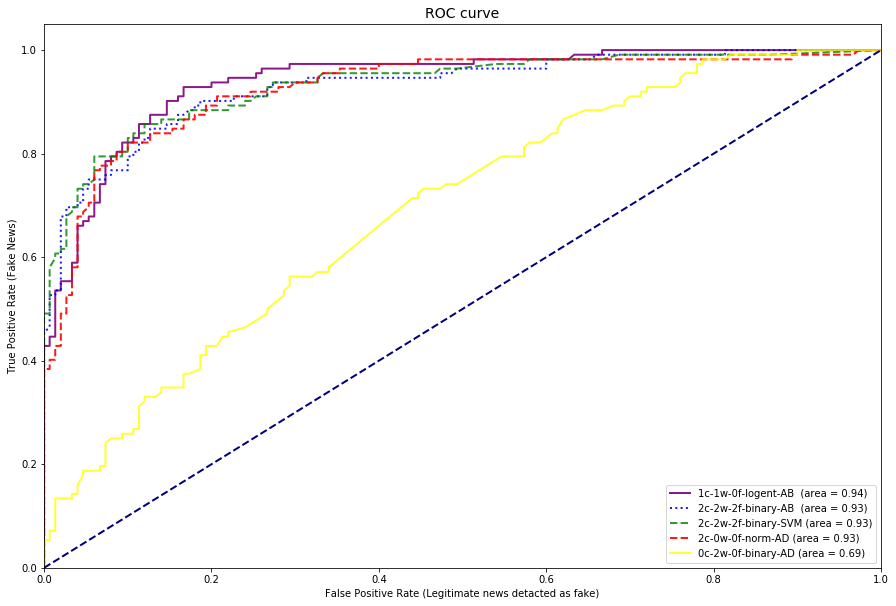

In [68]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#roc_auc_score(y_test, y_pred_scores[:, 1])

plt.figure(figsize=[15,10])
lw = 2


# 1c-1w-0f
fpr, tpr, thresholds = roc_curve(test_y_urdu, y_prob_urdu['1c-1w-0f'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y_urdu, y_prob_urdu['1c-1w-0f'])
plt.plot(fpr, tpr, color='purple',
         lw=lw, label='1c-1w-0f-logent-AB  (area = %0.2f)' % roc_auc, alpha=0.9, linestyle='-')



# 2c-2w-2f
fpr, tpr, thresholds = roc_curve(test_y_urdu, y_prob_urdu['2c-2w-2f'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y_urdu, y_prob_urdu['2c-2w-2f'])
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='2c-2w-2f-binary-AB  (area = %0.2f)' % roc_auc, alpha=0.9, linestyle=':')



# 2c-1w-0f  
fpr, tpr, thresholds = roc_curve(test_y_urdu, y_prob_urdu['2c-1w-0f'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y_urdu, y_prob_urdu['2c-1w-0f'])
plt.plot(fpr, tpr, color='green',
         lw=lw, label='2c-2w-2f-binary-SVM (area = %0.2f)' % roc_auc, alpha=0.8, linestyle='--')


# 2c-0w-0f
fpr, tpr, thresholds = roc_curve(test_y_urdu, y_prob_urdu['2c-0w-0f'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red',
         lw=lw, label='2c-0w-0f-norm-AD (area = %0.2f)' % roc_auc, alpha=0.9, linestyle='--')


# 0c-2w-0f
fpr, tpr, thresholds = roc_curve(test_y_urdu, y_prob_urdu['0c-2w-0f'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='yellow',
         lw=lw, label='0c-2w-0f-binary-AD (area = %0.2f)' % roc_auc, alpha=0.8)
  
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Legitimate news detacted as fake)')
plt.ylabel('True Positive Rate (Fake News)')
plt.title('ROC curve', size=14)
plt.legend(loc="lower right")
#plt.show()

plt.savefig(Path('figures/ROC-curves_UrdU.png'), dpi=300)

##### ROC for Translated Corpus

In [69]:
y_prob_MT = json.load(open(Path('results/y_probabilities_for_roccurve_MT.json')))
y_prob_MT.keys()
test_y_MT = y_prob_MT['test_y']

In [70]:
len(y_prob_MT['1c-1w-0f'])

120

In [71]:
len(test_y_MT)

120

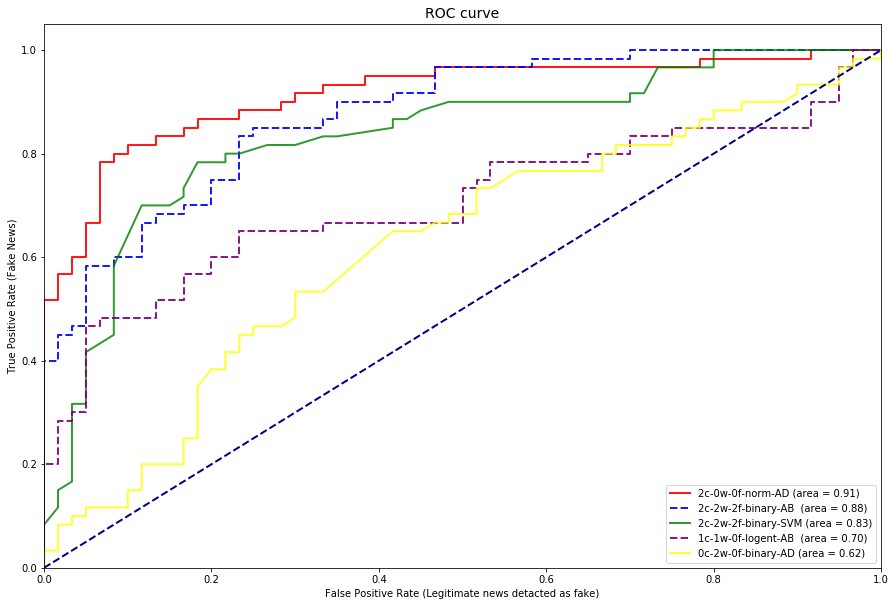

In [72]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#roc_auc_score(y_test, y_pred_scores[:, 1])

plt.figure(figsize=[15,10])
lw = 2


# 2c-0w-0f
fpr, tpr, thresholds = roc_curve(test_y_MT, y_prob_MT['2c-0w-0f'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red',
         lw=lw, label='2c-0w-0f-norm-AD (area = %0.2f)' % roc_auc, alpha=0.9, linestyle='-')



# 2c-2w-2f
fpr, tpr, thresholds = roc_curve(test_y_MT, y_prob_MT['2c-2w-2f'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y_MT, y_prob_MT['2c-2w-2f'])
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='2c-2w-2f-binary-AB  (area = %0.2f)' % roc_auc, alpha=0.9, linestyle='--')

# 2c-1w-0f  
fpr, tpr, thresholds = roc_curve(test_y_MT, y_prob_MT['2c-1w-0f'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y_MT,y_prob_MT['2c-1w-0f'])
plt.plot(fpr, tpr, color='green',
         lw=lw, label='2c-2w-2f-binary-SVM (area = %0.2f)' % roc_auc, alpha=0.8, linestyle='-')


# 1c-1w-0f
fpr, tpr, thresholds = roc_curve(test_y_MT, y_prob_MT['1c-1w-0f'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y_MT, y_prob_MT['1c-1w-0f'])
plt.plot(fpr, tpr, color='purple',
         lw=lw, label='1c-1w-0f-logent-AB  (area = %0.2f)' % roc_auc, alpha=0.9, linestyle='--')



# 0c-2w-0f
fpr, tpr, thresholds = roc_curve(test_y_MT, y_prob_MT['0c-2w-0f'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='yellow',
         lw=lw, label='0c-2w-0f-binary-AD (area = %0.2f)' % roc_auc, alpha=0.8)
  
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Legitimate news detacted as fake)')
plt.ylabel('True Positive Rate (Fake News)')
plt.title('ROC curve', size=14)
plt.legend(loc="lower right")
#plt.show()

plt.savefig(Path('figures/ROC-curves.png'), dpi=300)

##### ROC for  Mixed

In [73]:
y_prob_Mixed = json.load(open(Path('results/y_probabilities_for_roccurve_Mixed.json')))
y_prob_Mixed.keys()
test_y_Mixed = y_prob_Mixed['test_y']

In [74]:
len(y_prob_Mixed['2c-2w-2f'])

382

In [75]:
len(test_y_Mixed)

382

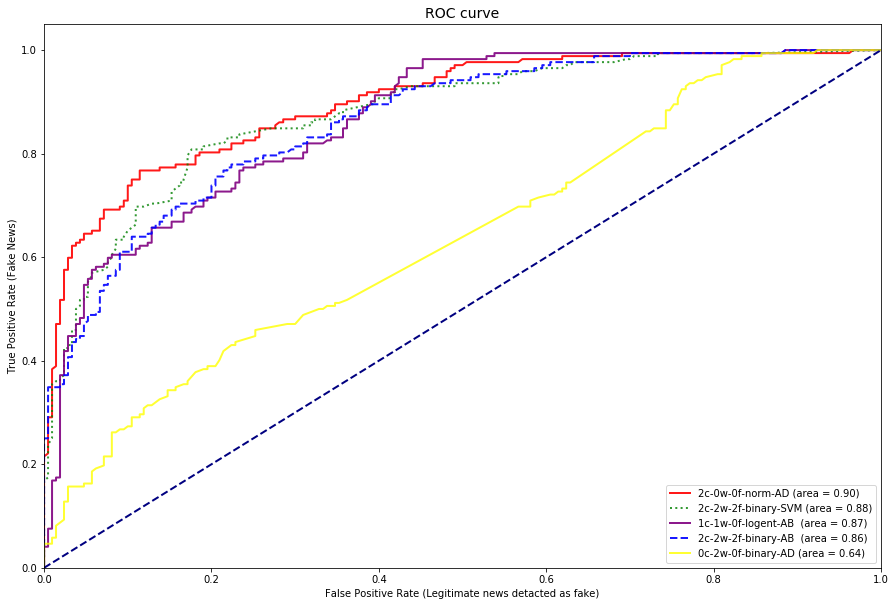

In [76]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#roc_auc_score(y_test, y_pred_scores[:, 1])

plt.figure(figsize=[15,10])
lw = 2



# 2c-0w-0f
fpr, tpr, thresholds = roc_curve(test_y_Mixed, y_prob_Mixed['2c-0w-0f'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red',
         lw=lw, label='2c-0w-0f-norm-AD (area = %0.2f)' % roc_auc, alpha=0.9, linestyle='-')

# 2c-1w-0f  
fpr, tpr, thresholds = roc_curve(test_y_Mixed, y_prob_Mixed['2c-1w-0f'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y_Mixed, y_prob_Mixed['2c-1w-0f'])
plt.plot(fpr, tpr, color='green',
         lw=lw, label='2c-2w-2f-binary-SVM (area = %0.2f)' % roc_auc, alpha=0.8, linestyle=':')


# 1c-1w-0f
fpr, tpr, thresholds = roc_curve(test_y_Mixed, y_prob_Mixed['1c-1w-0f'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='purple',
         lw=lw, label='1c-1w-0f-logent-AB  (area = %0.2f)' % roc_auc, alpha=0.9, linestyle='-')



# 2c-2w-2f
fpr, tpr, thresholds = roc_curve(test_y_Mixed, y_prob_Mixed['2c-2w-2f'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y_Mixed, y_prob_Mixed['2c-2w-2f'])
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='2c-2w-2f-binary-AB  (area = %0.2f)' % roc_auc, alpha=0.9, linestyle='--')


# 0c-2w-0f
fpr, tpr, thresholds = roc_curve(test_y_Mixed, y_prob_Mixed['0c-2w-0f'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='yellow',
         lw=lw, label='0c-2w-0f-binary-AD (area = %0.2f)' % roc_auc, alpha=0.8)


  
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Legitimate news detacted as fake)')
plt.ylabel('True Positive Rate (Fake News)')
plt.title('ROC curve', size=14)
plt.legend(loc="lower right")
#plt.show()

plt.savefig(Path('figures/MT_Orignal.png'), dpi=300)

##### ROC for Cross  MT_Orignal

In [77]:
y_prob_MT_Orignal = json.load(open(Path('results/y_probabilities_for_roccurve_MT_Orignal')))
y_prob_MT_Orignal.keys()
test_y_MT_Orignal = y_prob_MT_Orignal['test_y']

In [78]:
len(y_prob_MT_Orignal['2c-2w-2f'])

262

In [79]:
len(test_y_MT_Orignal)

262

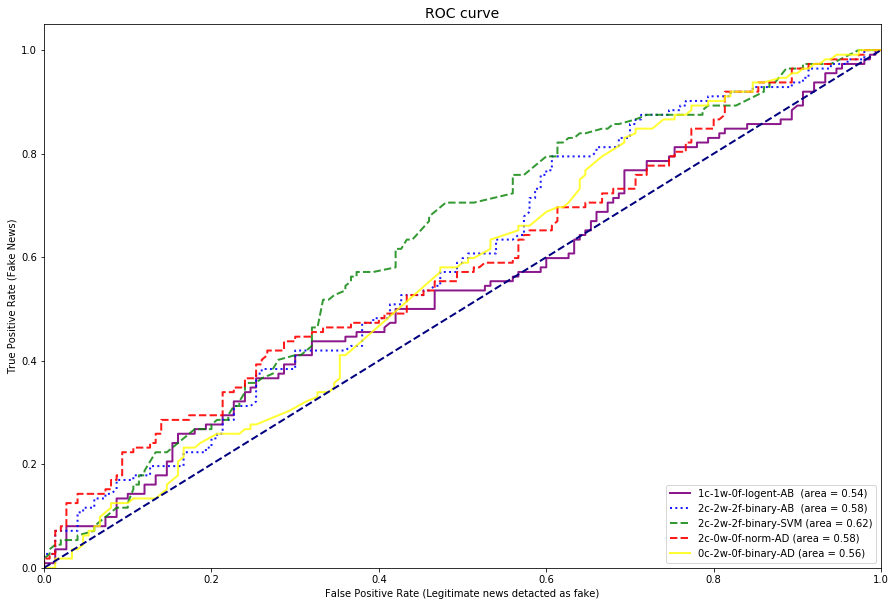

In [80]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#roc_auc_score(y_test, y_pred_scores[:, 1])

plt.figure(figsize=[15,10])
lw = 2


# 1c-1w-0f
fpr, tpr, thresholds = roc_curve(test_y_MT_Orignal, y_prob_MT_Orignal['1c-1w-0f'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='purple',
         lw=lw, label='1c-1w-0f-logent-AB  (area = %0.2f)' % roc_auc, alpha=0.9, linestyle='-')



# 2c-2w-2f
fpr, tpr, thresholds = roc_curve(test_y_MT_Orignal, y_prob_MT_Orignal['2c-2w-2f'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y_MT_Orignal, y_prob_MT_Orignal['2c-2w-2f'])
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='2c-2w-2f-binary-AB  (area = %0.2f)' % roc_auc, alpha=0.9, linestyle=':')



# 2c-1w-0f  
fpr, tpr, thresholds = roc_curve(test_y_MT_Orignal, y_prob_MT_Orignal['2c-1w-0f'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y_MT_Orignal, y_prob_MT_Orignal['2c-1w-0f'])
plt.plot(fpr, tpr, color='green',
         lw=lw, label='2c-2w-2f-binary-SVM (area = %0.2f)' % roc_auc, alpha=0.8, linestyle='--')


# 2c-0w-0f
fpr, tpr, thresholds = roc_curve(test_y_MT_Orignal, y_prob_MT_Orignal['2c-0w-0f'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red',
         lw=lw, label='2c-0w-0f-norm-AD (area = %0.2f)' % roc_auc, alpha=0.9, linestyle='--')


# 0c-2w-0f
fpr, tpr, thresholds = roc_curve(test_y_MT_Orignal, y_prob_MT_Orignal['0c-2w-0f'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='yellow',
         lw=lw, label='0c-2w-0f-binary-AD (area = %0.2f)' % roc_auc, alpha=0.8)
  
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Legitimate news detacted as fake)')
plt.ylabel('True Positive Rate (Fake News)')
plt.title('ROC curve', size=14)
plt.legend(loc="lower right")
#plt.show()

plt.savefig(Path('figures/MT_Orignal.png'), dpi=300)

##### ROC for Cross  Orignal_MT

In [90]:
y_prob_Orignal_MT = json.load(open(Path('results/y_probabilities_for_roccurve_Orignal_MT.json')))
y_prob_Orignal_MT.keys()
test_y_Orignal_MT = y_prob_Orignal_MT['test_y']

In [91]:
len(test_y_Orignal_MT)

120

In [92]:

len(y_prob_Orignal_MT['1c-1w-0f'])

120

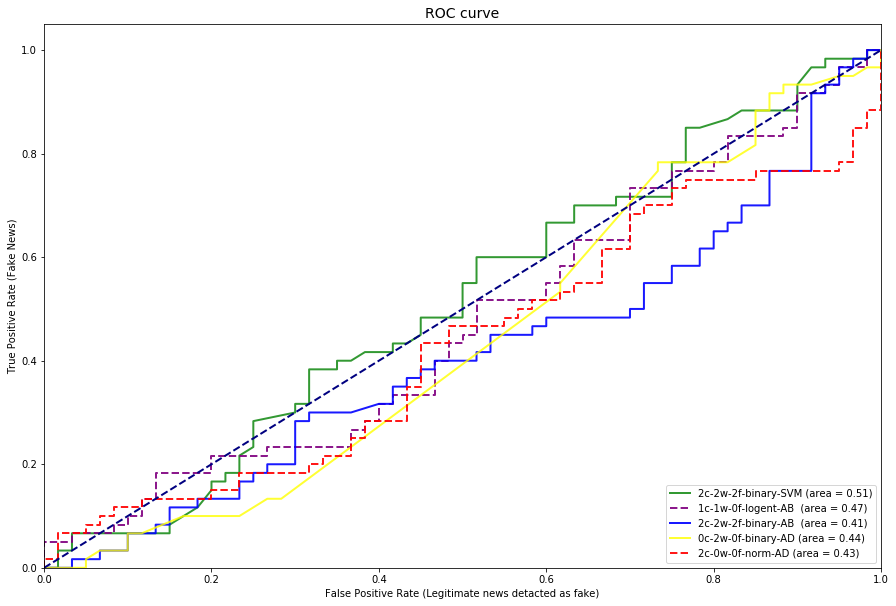

In [98]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#roc_auc_score(y_test, y_pred_scores[:, 1])

plt.figure(figsize=[15,10])
lw = 2


# 2c-1w-0f  
fpr, tpr, thresholds = roc_curve(test_y, y_prob_Orignal_MT['2c-1w-0f'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y_Orignal_MT, y_prob_Orignal_MT['2c-1w-0f'])
plt.plot(fpr, tpr, color='green',
         lw=lw, label='2c-2w-2f-binary-SVM (area = %0.2f)' % roc_auc, alpha=0.8, linestyle='-')



# 1c-1w-0f
fpr, tpr, thresholds = roc_curve(test_y_Orignal_MT, y_prob_Orignal_MT['1c-1w-0f'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='purple',
         lw=lw, label='1c-1w-0f-logent-AB  (area = %0.2f)' % roc_auc, alpha=0.9, linestyle='--')



# 2c-2w-2f
fpr, tpr, thresholds = roc_curve(test_y_Orignal_MT, y_prob_Orignal_MT['2c-2w-2f'])
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(test_y_Orignal_MT, y_prob_Orignal_MT['2c-2w-2f'])
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='2c-2w-2f-binary-AB  (area = %0.2f)' % roc_auc, alpha=0.9, linestyle='-')






# 0c-2w-0f
fpr, tpr, thresholds = roc_curve(test_y_Orignal_MT, y_prob_Orignal_MT['0c-2w-0f'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='yellow',
         lw=lw, label='0c-2w-0f-binary-AD (area = %0.2f)' % roc_auc, alpha=0.8)


# 2c-0w-0f
fpr, tpr, thresholds = roc_curve(test_y_Orignal_MT, y_prob_Orignal_MT['2c-0w-0f'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red',
         lw=lw, label='2c-0w-0f-norm-AD (area = %0.2f)' % roc_auc, alpha=0.9, linestyle='--')


  
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Legitimate news detacted as fake)')
plt.ylabel('True Positive Rate (Fake News)')
plt.title('ROC curve', size=14)
plt.legend(loc="lower right")
#plt.show()

plt.savefig(Path('figures/Orignal_MT.png'), dpi=300)